In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X[:10],y[:10])

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida
5  131876.90        99814.71        362861.36    New York
6  134615.46       147198.87        127716.82  California
7  130298.13       145530.06        323876.68     Florida
8  120542.52       148718.95        311613.29    New York
9  123334.88       108679.17        304981.62  California 0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64


LabelEncoder - To convert text variable "State" to numbers, we use "LabelEncoder" class to convert text to numbers

# OneHotEncoder

Once we run the above code we will see that states have been converted to numbers
e.g NewYork converted to 2, California converted to 0 , Florida converted to 1 etc

We use OneHotEncoder to introduce dummy variables. If we leave the dataset in above model will assume that New York (2) is higher than california (0) which is not right so to avoid this we use dummy variables using OneHotEncoder as shown below

In [4]:
states = pd.get_dummies(X["State"],drop_first=False)
states

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [5]:
del X["State"]

In [6]:
X = pd.concat([X,states],axis=1)
X

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train, X_test, y_train, y_test)

    R&D Spend  Administration  Marketing Spend  California  Florida  New York
33   55493.95       103057.49        214634.81           0        1         0
35   46014.02        85047.44        205517.64           0        0         1
26   75328.87       144135.98        134050.07           0        1         0
34   46426.07       157693.92        210797.67           1        0         0
18   91749.16       114175.79        294919.57           0        1         0
7   130298.13       145530.06        323876.68           0        1         0
14  119943.24       156547.42        256512.92           0        1         0
45    1000.23       124153.04          1903.93           0        0         1
48     542.05        51743.15             0.00           0        0         1
29   65605.48       153032.06        107138.38           0        0         1
15  114523.61       122616.84        261776.23           0        0         1
30   61994.48       115641.28         91131.24           0      

In [8]:
regres = LinearRegression()
regres.fit(X_train,y_train)


LinearRegression()

In [9]:
y_pred = regres.predict(X_test)
print(y_pred)

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374687
 113969.43533012 167921.0656955 ]


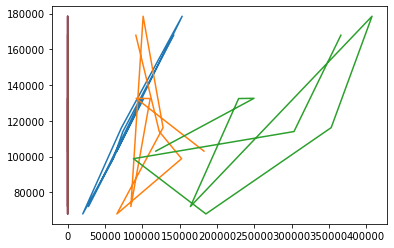

In [10]:

plt.plot(X_test,y_pred)
